In [ ]:
bream_length = [25.4, 26.3,26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0,36.0, 36.0, 37.0,
38.5, 38.5, 39.5, 41.0, 41.0]

In [ ]:
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
925.0, 975.0, 950.0]

도미의 길이, 무게와 같이 특징을 표현한 것을 '특성'이라 한다.
위 리스트를 각 x축 y축 그래프에 점으로 표현한 것을 '산점도'라 한다.
이 그래프를 그리는 대표적 패키지는 '맷플롭립(matplotlib)'
-> import로 불러보자

In [ ]:
import matplotlib.pyplot as plt

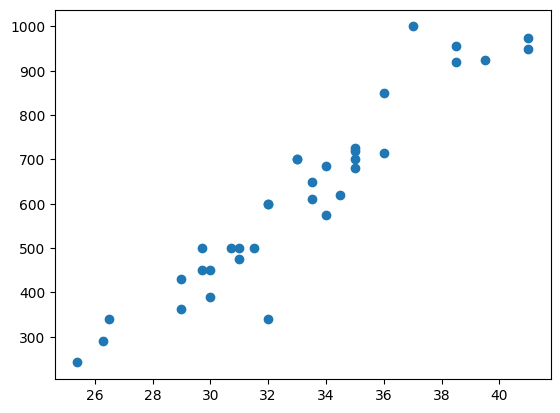

In [ ]:
plt.scatter(bream_length, bream_weight)

Text(0.5, 0, 'length')

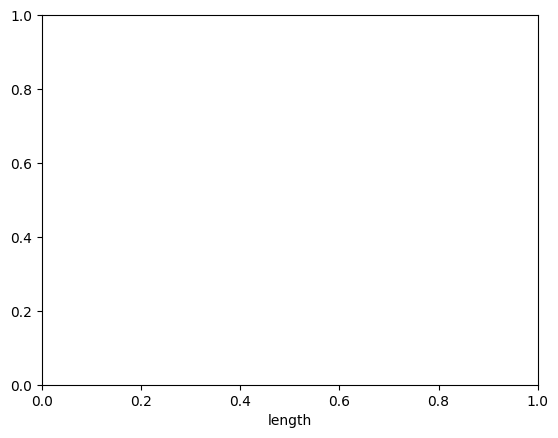

In [ ]:
plt.xlabel('length')

Text(0, 0.5, 'weight')

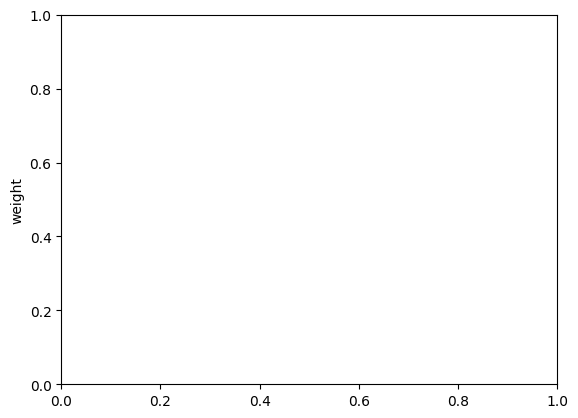

In [ ]:
plt.ylabel('weight')

In [ ]:
plt.show()

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]

In [ ]:
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
                12.2, 19.7, 19.9]

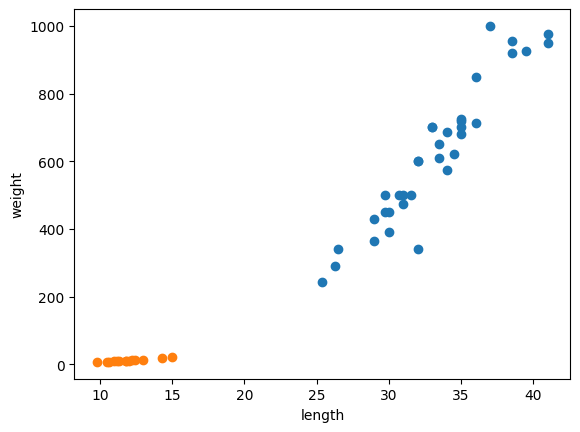

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

최근접 이웃 리스트

In [ ]:
length = bream_length + smelt_length

In [ ]:
weight = bream_weight + smelt_weight

이렇게 도미와 빙어의 길이, 무게를 각각 합친 후, 이 리스트를 세로로 늘어뜨린 2차원 리스트를 만들거임
가장 쉬운 방법 : zip()함수와 리스트 내포 구문을 사용하는 것

zip()함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내서 반환한다.

In [ ]:
fish_data = [[l,w] for l, w in zip(length, weight)]

In [ ]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


리스트 데이터 준비 완료! 다음으로 필요한 것은 '정답 데이터' / 정답 데이터를 위해서는 규칙을 만들어야 한다.

그러려면 일단 무슨 생선이 도미인지 빙어인지를 알려줘야 함 -> 도미를[1], 빙어를[0]으로 표현해서 컴퓨터에게 알려줄 것임. 곱셈 연산자 사용해서 그냥 숫자 기입할거임

In [ ]:
fish_target = [1]*35 +[0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


이제 이 fish_target을 fish_data에 묶어서 fish_data 자료를 도미와 빙어로 구분할 것이다.
그러기 위해선 KNeighborsClassfier 를 import 해줄거임
KNeighborsClassfier는 k-최근접 이웃 알고리즘을 구현한 클래스이다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
이걸 변수 지정해서 편하게 입력할거임

In [ ]:
kn = KNeighborsClassifier()

함수를 가져왔으니 이걸로 데이터를 학습시킬거임. 이 과정을 '훈련'이라 함
사이킷런에서는 fit() 코드가 그 역할을 해줌.

In [ ]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

fit()으로 훈련시킨걸 잘 되었는지 평가해주는 함수가 score()임 이것도 써볼 것

In [ ]:
kn.score(fish_data, fish_target)

1.0

이제 그러면 아무 숫자나 넣어서 도미와 빙어 중 어떤 곳에 속할지 예측할 수 있음

*   항목 추가
*   항목 추가



In [ ]:
kn.predict([[10, 10]])

array([0])

이렇게 데이터만 준비한다면 k-최근접 이웃 알고리즘으로 새로운 데이터를 예측할 수 있다!
다만, 데이터가 아~주 많은 경우 사용하기 어렵다.
이유는 데이터가 크기 때문에 메모리 소모가 크고, 새로운 데이터를 예측할 시 데이터 간의 직선거리 계산하는데 걸리는 소요 시간이 많기 때문이다.

위에서 쓴 KNeighborsClassifier 클래스도 마찬가지이다.
이 클래스는 fix_X 속성에 fish_dat를, _y 속성에는 fish_target을 가지고 있다.

In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


즉, k-최근접 이웃 알고리즘은 사실상 훈련된게 없는 셈이다!!
우리가 fit()에 넣은 데이터를 가지고 있다가 새로운 데이터를 입력하면 그 데이터와 가까운 데이터를 참고해서 도미인지 빙어인지 구분해주는 것!

더불어 가까운 데이터를 참고할 때 참고할 데이터의 수도 정할 수 있다!
*참고로 기본 값은 5이다.
기준을 n_neighbors 매개변수로 바꾸어보자

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

49개 전체로 잡으니 웬만하면 도미로 출력할 것임.
가급적 기본값 5를 사용하는게 더 정확할 것으로 예상됨.